<a href="https://colab.research.google.com/github/RRSSsantosh-cse/FSM_IITD-AIA_ML/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path='/content/drive/MyDrive/Machine_Learning/Medical.csv'
dataset = pd.read_csv(path)
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The provided code snippet performs several steps for preprocessing the data:

It extracts the relevant columns from the dataset. The features are selected from the 'age', 'sex', 'bmi', 'children', 'smoker', and 'region' columns, and they are assigned to the variable `X`. The target variable is selected from the 'charges' column and assigned to the variable `y`.

Next, it converts the categorical variables in `X` to numerical values using one-hot encoding. This is done using the `pd.get_dummies()` function. The resulting encoded features are assigned to the variable `X_encoded`.

The code converts the data from Pandas DataFrame to NumPy arrays. `X_encoded.values` returns the values of `X_encoded` as a NumPy array, and it is assigned back to `X`. Similarly, `y.values` returns the values of `y` as a NumPy array, and it is assigned back to `y`.

 Finally, the code normalizes the feature values in `X` using z-score normalization. It subtracts the mean of `X` along each column (`np.mean(X, axis=0)`) from `X`, and then divides the result by the standard deviation of `X` along each column (`np.std(X, axis=0)`). This ensures that each feature has a mean of 0 and a standard deviation of 1, which can be useful for certain machine learning algorithms.

Overall, the code prepares the dataset by extracting relevant columns, encoding categorical variables, converting the data to NumPy arrays, and normalizing the feature values. These steps are commonly performed to preprocess the data before training a machine learning model.

In [6]:
# Extract the relevant columns from the dataset
X = dataset[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = dataset['charges']

# Convert categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Convert the data to numpy arrays
X = X_encoded.values
y = y.values

# Normalize the feature values
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

The provided code snippet performs several steps for preprocessing the data:

 It extracts the relevant columns from the dataset. The features are selected from the 'age', 'sex', 'bmi', 'children', 'smoker', and 'region' columns, and they are assigned to the variable `X`. The target variable is selected from the 'charges' column and assigned to the variable `y`.

Next, it converts the categorical variables in `X` to numerical values using one-hot encoding. This is done using the `pd.get_dummies()` function. The resulting encoded features are assigned to the variable `X_encoded`.

The code converts the data from Pandas DataFrame to NumPy arrays. `X_encoded.values` returns the values of `X_encoded` as a NumPy array, and it is assigned back to `X`. Similarly, `y.values` returns the values of `y` as a NumPy array, and it is assigned back to `y`.

Finally, the code normalizes the feature values in `X` using z-score normalization. It subtracts the mean of `X` along each column (`np.mean(X, axis=0)`) from `X`, and then divides the result by the standard deviation of `X` along each column (`np.std(X, axis=0)`). This ensures that each feature has a mean of 0 and a standard deviation of 1, which can be useful for certain machine learning algorithms.

Overall, the code prepares the dataset by extracting relevant columns, encoding categorical variables, converting the data to NumPy arrays, and normalizing the feature values. These steps are commonly performed to preprocess the data before training a machine learning model.

In [12]:
class LinearRegression:
    def __init__(self, learning_rate=0.001, num_iterations=10000):     #constructor with default parameters
        self.learning_rate = learning_rate   #initialsie the learning rate
        self.num_iterations = num_iterations #initialise the number of iterations

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)  # Initialize weights with zeros
        self.cost_history = []         #intialise the cost _history

        for i in range(self.num_iterations):
            y_pred = self.predict(X)
            error = y_pred - y          #calculate error

            # Calculate gradients
            gradients = np.dot(X.T, error) / len(X)

            # Update weights
            self.weights[1:] -= self.learning_rate * gradients
            self.weights[0] -= self.learning_rate * np.mean(error)

            # Calculate and store the cost
            cost = np.mean((error ** 2) / 2)
            self.cost_history.append(cost)

    def predict(self, X):         #predict for each value of test data
        return np.dot(X, self.weights[1:]) + self.weights[0]

In [13]:
model = LinearRegression(learning_rate=0.0001, num_iterations=10000) #creating an object for Linearregression class
model.fit(X_train, y_train)     #fit the model

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error (MSE)
mse = np.mean((y_pred - y_test) ** 2)
print("Mean Squared Error:",math.sqrt(mse))

Mean Squared Error: 7961.961965534005


Scatter Plot

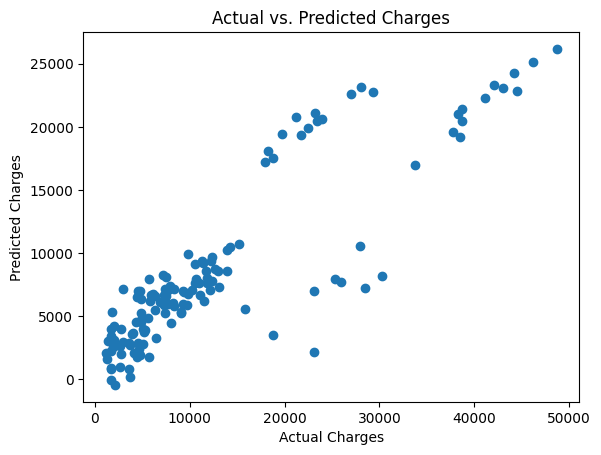

In [14]:
plt.scatter(y_test, y_pred)         #plot scatter
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges')
plt.show()

Cost plot

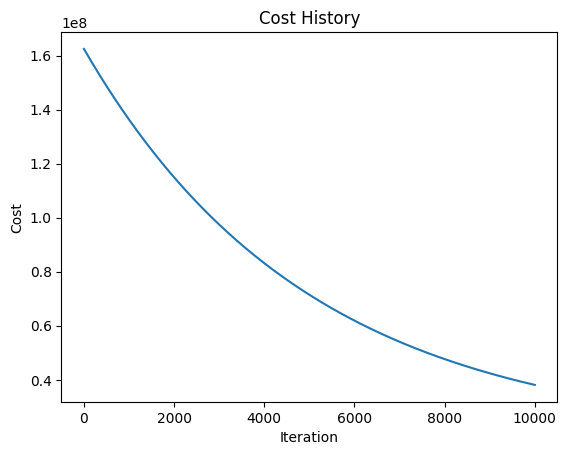

In [15]:
plt.plot(range(1, len(model.cost_history) + 1), model.cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()

Residual plot

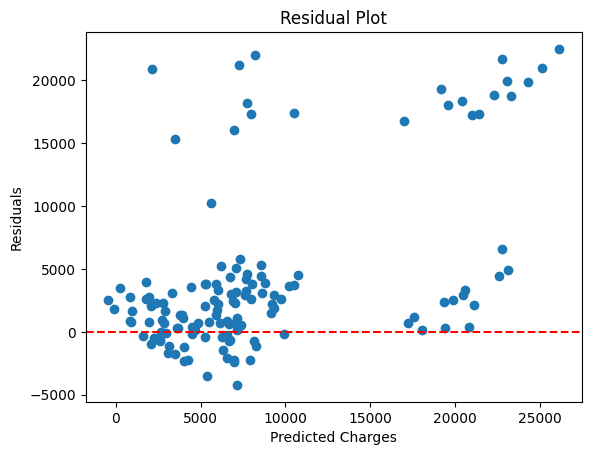

In [16]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()
